In [1]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def ewma(x, alpha):
    '''
    Returns the exponentially weighted moving average of x.

    Parameters:
    -----------
    x : array-like
    alpha : float {0 <= alpha <= 1}

    Returns:
    --------
    ewma: numpy array
          the exponentially weighted moving average
    '''
    # Coerce x to an array
    x = np.array(x)
    n = x.size

    # Create an initial weight matrix of (1-alpha), and a matrix of powers
    # to raise the weights by
    w0 = np.ones(shape=(n,n)) * (1-alpha)
    p = np.vstack([np.arange(i,i-n,-1) for i in range(n)])

    # Create the weight matrix
    w = np.tril(w0**p,0)

    # Calculate the ewma
    return np.dot(w, x[::np.newaxis]) / w.sum(axis=1)

def show_plots(path,name):
    reward = np.load("training_data/"+ path +"_reward.npy")
    loss = np.load("training_data/"+ path +"_loss.npy")
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title(name + ' Reward (Moving Average)')
    plt.xlabel("Episode Played")
    plt.ylabel("Episode Reward")
    # plt.plot(ewma(reward,0.01))
    plt.plot(moving_average(reward,1000))
    plt.subplot(132)
    plt.title(name + ' Loss (Moving Average)')
    # plt.plot(ewma(loss,0.5))
    plt.plot(moving_average(loss[100000:],2000))
    plt.show()


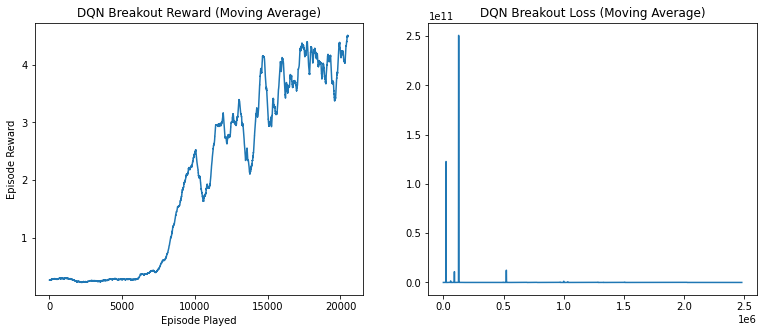

In [2]:
show_plots("dqn_breakout_crop","DQN Breakout")

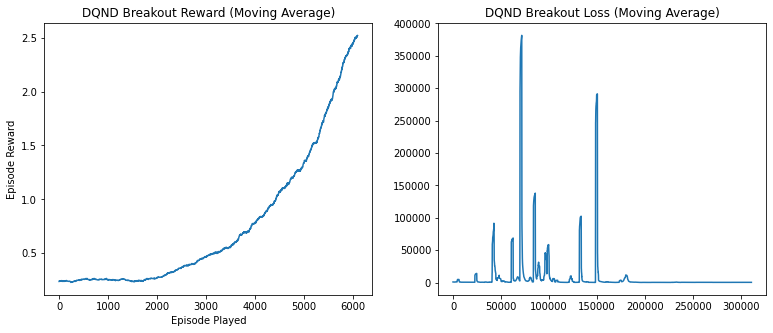

In [6]:
show_plots("dqnd_breakout_crop","DQND Breakout")

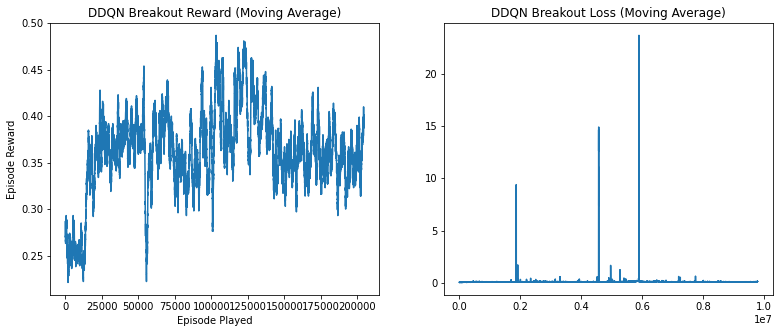

In [4]:
show_plots("ddqn","DDQN Breakout")

In [5]:
show_plots("dqn_per_pong","DQN PER Pong")


FileNotFoundError: [Errno 2] No such file or directory: 'training_data/dqn_per_pong_reward.npy'